In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df =pd.read_csv("Titanic_train.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df["Age"] =df["Age"].fillna(df["Age"].median())

In [8]:
df["Cabin"] =df["Cabin"].fillna(df["Cabin"].mode())[0]

In [9]:
df["Embarked"] =df["Embarked"].fillna(df["Embarked"].mode())[0]

In [10]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis =1,inplace = True)

In [13]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,S
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


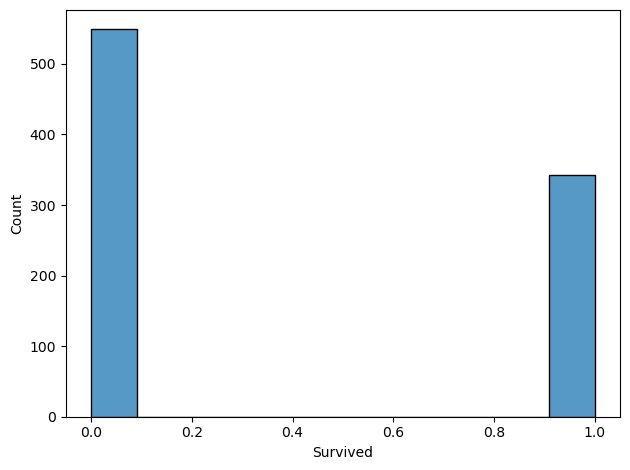

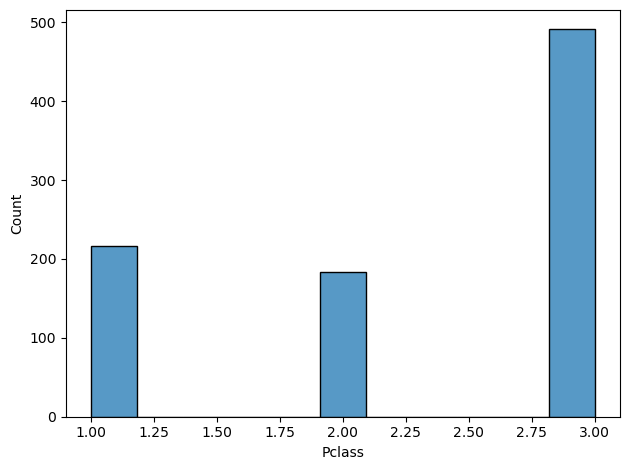

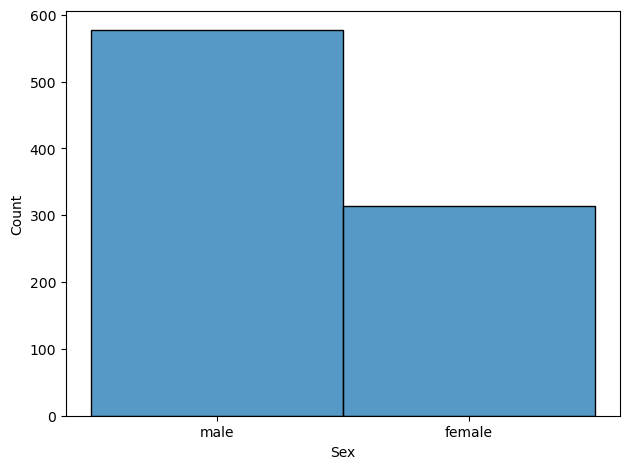

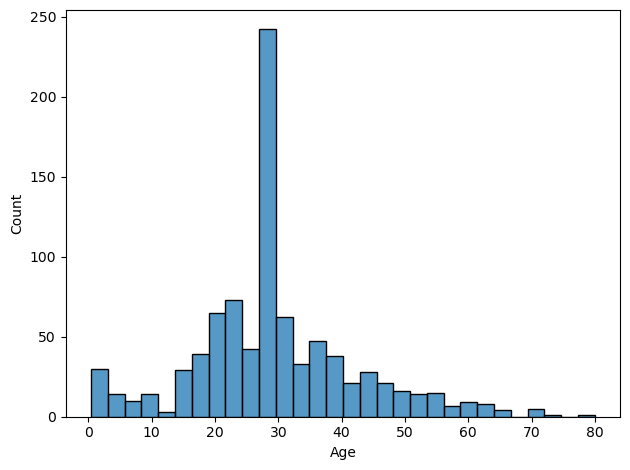

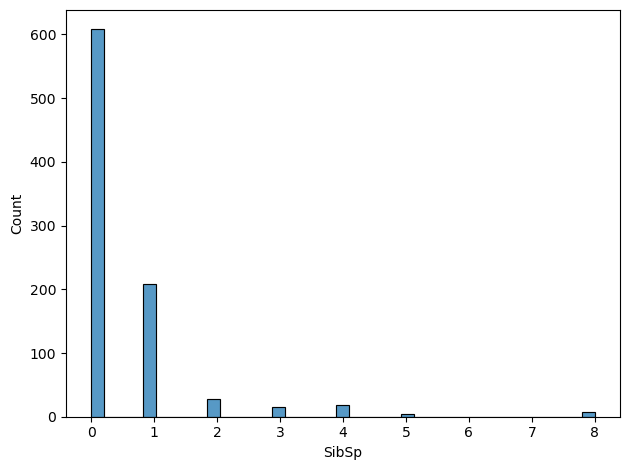

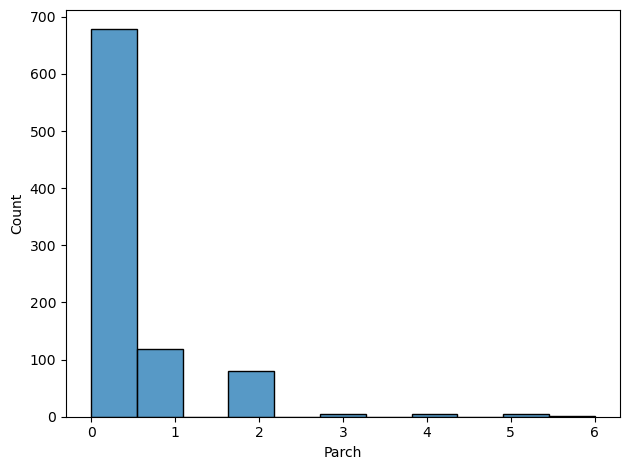

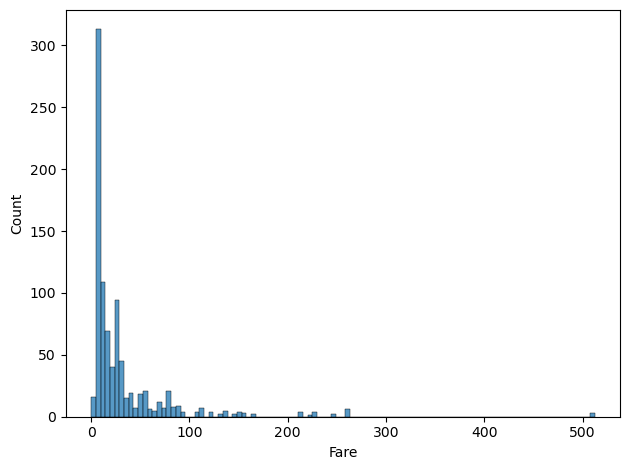

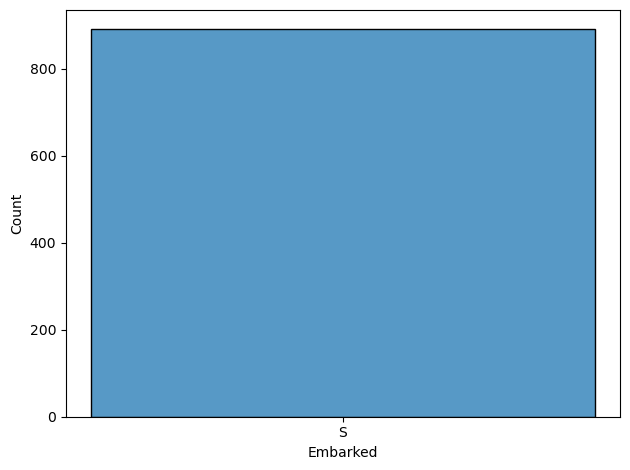

In [14]:
for col in df.columns:
    sns.histplot(df[col])
    plt.tight_layout()
    plt.show()

<Axes: xlabel='Pclass'>

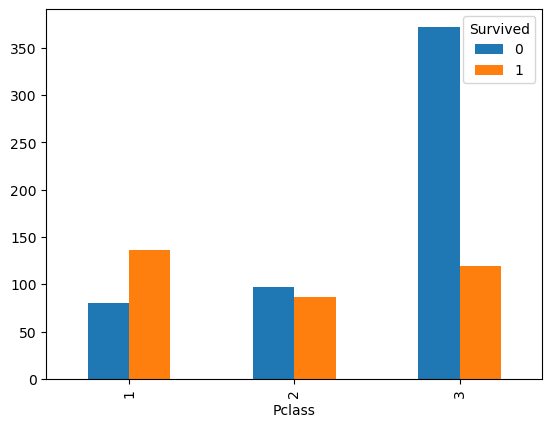

In [15]:
pd.crosstab(df["Pclass"],df["Survived"]).plot(kind ="bar")

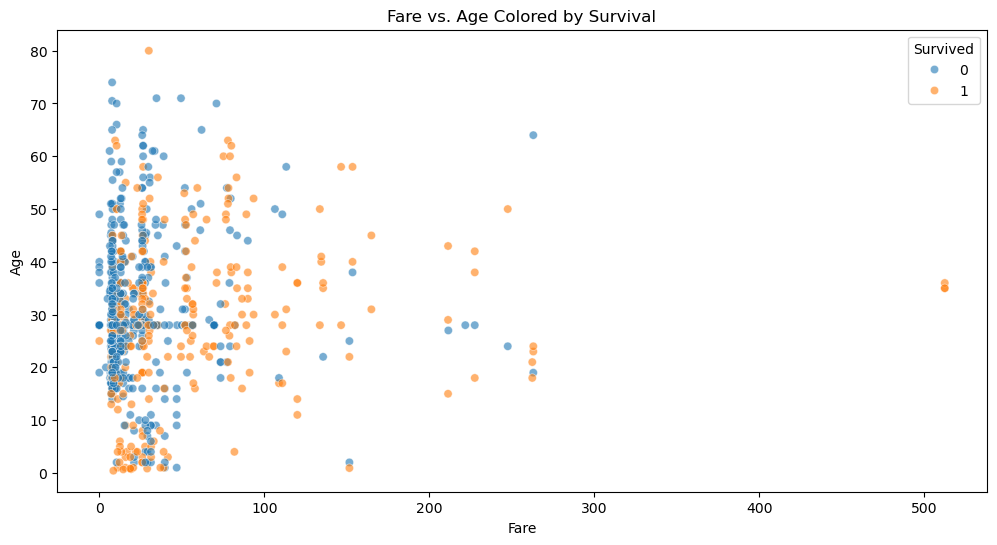

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Fare', y='Age', hue='Survived', data=df, alpha=0.6)
plt.title('Fare vs. Age Colored by Survival')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()

<Figure size 1000x600 with 0 Axes>

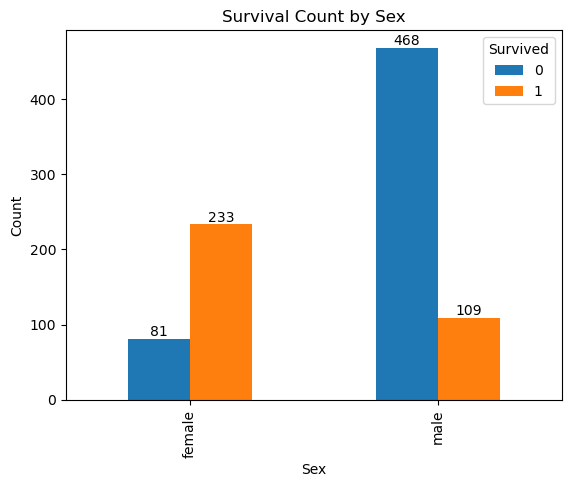

In [17]:
ct1 = pd.crosstab(df.Sex, df.Survived)
plt.figure(figsize=(10, 6))
ax1 = ct1.plot(kind='bar')
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

for container in ax1.containers:  # Adding data labels
    ax1.bar_label(container)

plt.show()

<Figure size 1000x600 with 0 Axes>

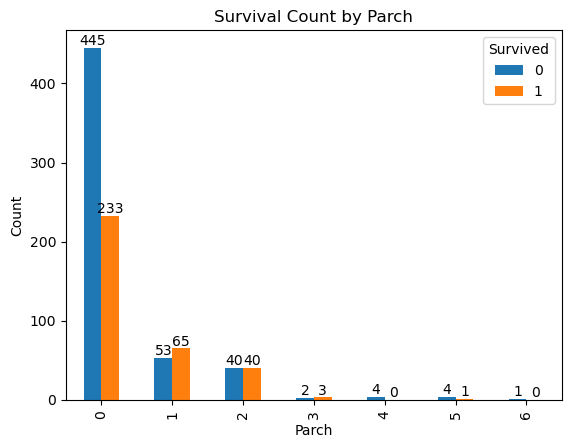

In [18]:
ct1 = pd.crosstab(df.Parch, df.Survived)
plt.figure(figsize=(10, 6))
ax1 = ct1.plot(kind='bar')
plt.title('Survival Count by Parch')
plt.xlabel('Parch')
plt.ylabel('Count')

for container in ax1.containers:  # Adding data labels
    ax1.bar_label(container)

plt.show()

In [19]:
df.corr(numeric_only =True)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


<Axes: >

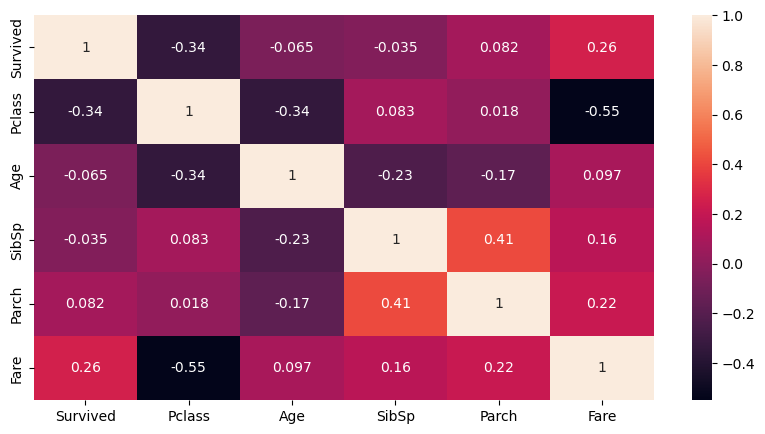

In [20]:
plt.figure(figsize =(10,5))
sns.heatmap(df.corr(numeric_only =True),annot =True)

In [21]:
numeric_only = df.select_dtypes(include =["number"])

In [22]:
numeric_only

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,28.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


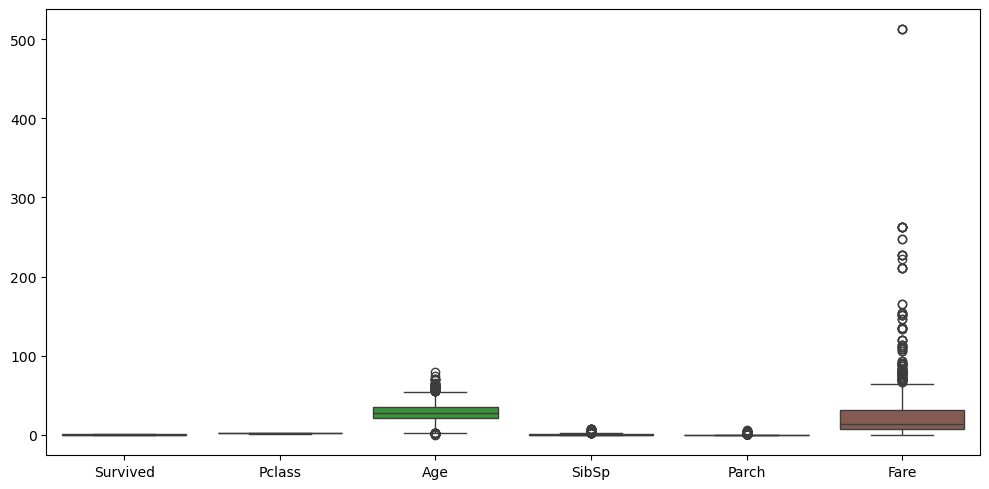

In [23]:
plt.figure(figsize =(10,5))
sns.boxplot(numeric_only)
plt.tight_layout()
plt.show()

In [24]:
numeric_only =df.select_dtypes(include =["number"])
def outlier_detection():
    for val in numeric_only.columns:
        m =df[val].max()
        print(m)
        min =df[val].min()
        print(min)
        df[val] =df[val].clip(lower =min,upper =m)
    

    
    
    


    


In [25]:
numeric_only.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

<Axes: >

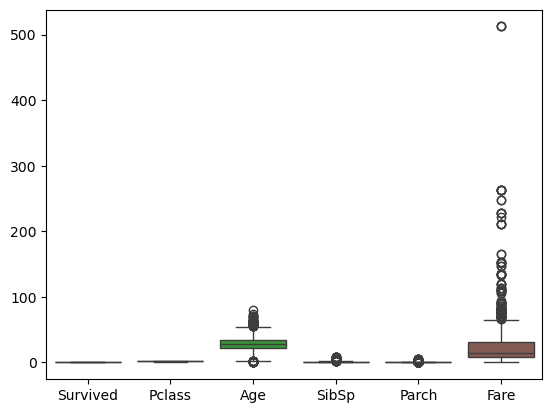

In [26]:
sns.boxplot(numeric_only)

In [27]:
def outlier_detection(data,columns):
    for col in columns:
        Q1 =df[col].quantile(0.25)
        Q3 =df[col].quantile(0.75)
        iqr = Q3-Q1
        upper,lower =Q3+1.5*iqr,Q1-1.5*iqr
        df[col] =df[col].clip(lower =lower,upper =upper)
    return outlier_detection

In [28]:
outlier_detection(df,['Age', 'SibSp','Fare'])

<function __main__.outlier_detection(data, columns)>

<Axes: >

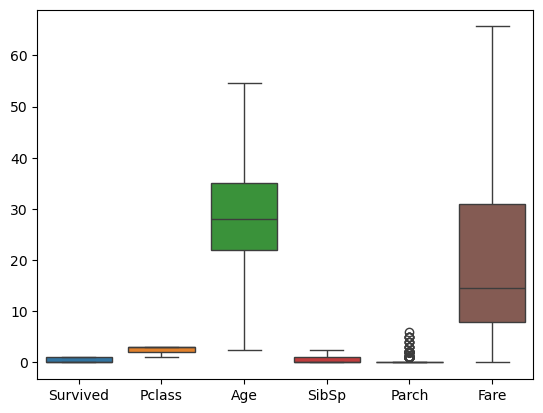

In [29]:
sns.boxplot(df)

In [30]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [31]:
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1.0,0,7.2500,0
1,1,1,0,38.0,1.0,0,65.6344,0
2,1,3,0,26.0,0.0,0,7.9250,0
3,1,1,0,35.0,1.0,0,53.1000,0
4,0,3,1,35.0,0.0,0,8.0500,0


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the specified columns
df[['Age','Fare']] = scaler.fit_transform(df[['Age','Fare']])
#t_train.head()

In [33]:
# Convert categorical variables into dummy/indicator variables
data = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True,dtype= float)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_1
0,0,3,0.375000,1.0,0,0.110460,1.0
1,1,1,0.682692,1.0,0,1.000000,0.0
2,1,3,0.451923,0.0,0,0.120745,0.0
3,1,1,0.625000,1.0,0,0.809027,0.0
4,0,3,0.625000,0.0,0,0.122649,1.0


In [34]:
#split the data 

In [35]:
x =data.iloc[:,1:]
y =data.iloc[:,0]


In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size =0.2,random_state =41)


In [37]:
x_train.shape

(712, 6)

In [38]:
y_train.shape

(712,)

In [39]:
# Build the model

In [40]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve
import xgboost as xgb

In [41]:
model = xgb.XGBClassifier(subsamples=0.5,objective ="multi:softmax")

In [42]:
# Determine the number of unique classes
num_classes = len(set(y_train))
# Define the parameter grid
params = {
    'n_estimators': [24,25,26,28],
    'max_depth': [4,12,14,16],
    'learning_rate': [0.1, 0.01, 0.001],
    'eval_metric': ['logloss', 'mlogloss', 'merror', 'error'],
    'num_class': [num_classes]}

grd = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=5)
grd.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softmax', ...),
             param_grid={'eval_metric': ['logloss', 'mlogloss', 'merror',
                                         'error'],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [4, 12, 14, 16],
                         'n_estimators': [24, 25, 26, 28], 'num_class': [2]},
             scoring='accuracy')

In [43]:
grd.best_params_

{'eval_metric': 'logloss',
 'learning_rate': 0.1,
 'max_depth': 4,
 'n_estimators': 24,
 'num_class': 2}

In [44]:
final_model = grd.best_estimator_     # best parameter selected for model

In [45]:
final_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=24,
              n_jobs=None, num_class=2, num_parallel_tree=None, ...)

In [46]:
yhat_train = final_model.predict(x_train)         # for training dataset
cm = confusion_matrix(y_train,yhat_train)
print(cm)
print(classification_report(y_train,yhat_train))

[[424  20]
 [ 82 186]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       444
           1       0.90      0.69      0.78       268

    accuracy                           0.86       712
   macro avg       0.87      0.82      0.84       712
weighted avg       0.86      0.86      0.85       712



In [47]:
yhat_test = final_model.predict(x_test)         # for testing dataset
cm = confusion_matrix(y_test,yhat_test)
print(cm)
print(classification_report(y_test,yhat_test))

[[101   4]
 [ 25  49]]
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       105
           1       0.92      0.66      0.77        74

    accuracy                           0.84       179
   macro avg       0.86      0.81      0.82       179
weighted avg       0.85      0.84      0.83       179



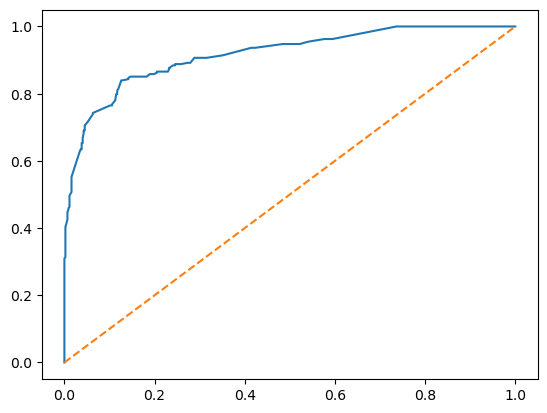

0.8244924028506118


In [48]:
ytrain_proba =  final_model.predict_proba(x_train)[:,1]
fpr, tpr, thresh = roc_curve(y_train,ytrain_proba)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='dashed')
plt.show()
auc = roc_auc_score(y_train,yhat_train)
print(auc)

# LightGBM

In [49]:
!pip install lightgbm

In [50]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

In [51]:
# Define the parameter grid
params = {
    'n_estimators': [50, 100],
    'max_depth': [4, 8, 12],
    'learning_rate': [0.1, 0.01],
    'num_leaves': [31, 50],
    'boosting_type': ['gbdt'],
    'objective': ['binary'],
    'metric': ['binary_logloss'],
    'subsample': [0.8, 1.0],
    'max_bin': [127, 255]
}

# Initialize the LightGBM model
model = lgb.LGBMClassifier()

# Initialize GridSearchCV 
grd = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=3)

# Fit the model
grd.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 178, number of negative: 296
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 173
[LightGBM] [Info] Number of data points in the train set: 474, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375527 -> initscore=-0.508576
[LightGBM] [Info] Start training from score -0.508576
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'boosting_type': ['gbdt'],
                         'learning_rate': [0.1, 0.01], 'max_bin': [127, 255],
                         'max_depth': [4, 8, 12], 'metric': ['binary_logloss'],
                         'n_estimators': [50, 100], 'num_leaves': [31, 50],
                         'objective': ['binary'], 'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [54]:
grd.best_params_

{'boosting_type': 'gbdt',
 'learning_rate': 0.1,
 'max_bin': 127,
 'max_depth': 12,
 'metric': 'binary_logloss',
 'n_estimators': 50,
 'num_leaves': 31,
 'objective': 'binary',
 'subsample': 0.8}

In [55]:
final_model2 =grd.best_estimator_

In [57]:
yhat_train = final_model2.predict(x_train)         # for training dataset
cm = confusion_matrix(y_train,yhat_train)
print(cm)
print(classification_report(y_train,yhat_train))

[[420  24]
 [ 50 218]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       444
           1       0.90      0.81      0.85       268

    accuracy                           0.90       712
   macro avg       0.90      0.88      0.89       712
weighted avg       0.90      0.90      0.89       712



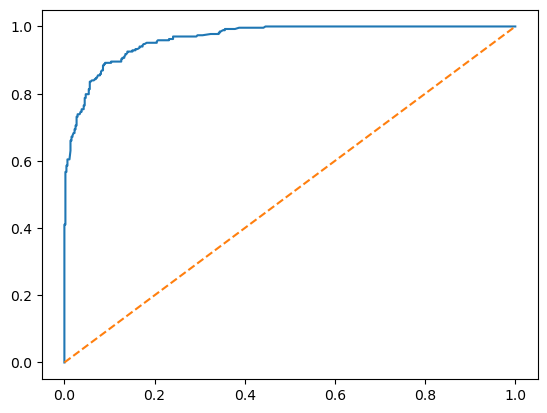

0.8796893908834207


In [59]:
ytrain_proba =  final_model2.predict_proba(x_train)[:,1]
fpr, tpr, thresh = roc_curve(y_train,ytrain_proba)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='dashed')
plt.show()
auc = roc_auc_score(y_train,yhat_train)
print(auc)

In [60]:
yhat_test = final_model2.predict(x_test)         # for testing dataset
cm = confusion_matrix(y_test,yhat_test)
print(cm)
print(classification_report(y_test,yhat_test))

[[100   5]
 [ 24  50]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       105
           1       0.91      0.68      0.78        74

    accuracy                           0.84       179
   macro avg       0.86      0.81      0.82       179
weighted avg       0.85      0.84      0.83       179



## LightGBM (LGBM):
Strengths:
Good precision, recall, and F1-score on both training and test data, particularly for class 0.
High overall accuracy on both training (0.89) and test data (0.84).
Weaknesses:
Lower recall for class 1 on the training data (0.78) and test data (0.69), indicating potential false negatives.
Performance metrics are slightly lower compared to XGBoost, especially for class 1.

# XGBoost (XGBM):
Strengths:
High precision, recall, and F1-score on both training and test data, especially for class 0.
High overall accuracy on both training (0.91) and test data (0.85).
Weaknesses:
Slightly lower recall for class 1 on the test data (0.70), indicating some false negatives.
Shows a degree of overfitting, as indicated by the drop in accuracy from training to test data.


# On Testing Dataset

In [104]:
df1 =pd.read_csv("Titanic_test.csv")
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [107]:
df1.shape

(418, 11)

In [108]:
df1.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [109]:
df1.drop(columns ="Name",inplace =True)

In [111]:
df1.drop(columns ="PassengerId",inplace =True)

In [114]:
df1.drop(columns ="Cabin",inplace =True)

In [116]:
df1.drop(columns ="Ticket",inplace =True)

In [119]:
df1.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [120]:
df1["Age"] =df1["Age"].fillna(df1["Age"].median())

In [121]:
df1["Fare"] =df1["Fare"].fillna(df1["Fare"].median())

In [122]:
df1.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [123]:
# Convert categorical variables into dummy/indicator variables
data2= pd.get_dummies(df1, columns=['Sex', 'Embarked'], drop_first=True,dtype= float)
data2.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1.0,1.0,0.0
1,3,47.0,1,0,7.0000,0.0,0.0,1.0
2,2,62.0,0,0,9.6875,1.0,1.0,0.0
3,3,27.0,0,0,8.6625,1.0,0.0,1.0
4,3,22.0,1,1,12.2875,0.0,0.0,1.0


In [132]:
x = data2.iloc[:,0:6]

In [133]:
pred_test2 = final_model2.predict(x)        # pre testing dataset
pred_test2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [134]:
pred = pd.DataFrame(pred_test2)

In [135]:
data2["prediction"] = pred

In [136]:
data2

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,prediction
0,3,34.5,0,0,7.8292,1.0,1.0,0.0,0
1,3,47.0,1,0,7.0000,0.0,0.0,1.0,0
2,2,62.0,0,0,9.6875,1.0,1.0,0.0,0
3,3,27.0,0,0,8.6625,1.0,0.0,1.0,0
4,3,22.0,1,1,12.2875,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...
413,3,27.0,0,0,8.0500,1.0,0.0,1.0,0
414,1,39.0,0,0,108.9000,0.0,0.0,0.0,1
415,3,38.5,0,0,7.2500,1.0,0.0,1.0,0
416,3,27.0,0,0,8.0500,1.0,0.0,1.0,0


In [139]:
data2['prediction'].value_counts() # unique counts for survival and not survival

prediction
0    338
1     80
Name: count, dtype: int64

In [141]:
grp=data2.groupby('prediction')  #group by prediction
grp             # it shows only object it will be just stored somewhere

In [142]:
for x,y in grp:       # group by 
    print(x,y)
    print('-'*60)     # result predictionwise 0 and 1

0      Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S  \
0         3  34.5      0      0   7.8292       1.0         1.0         0.0   
1         3  47.0      1      0   7.0000       0.0         0.0         1.0   
2         2  62.0      0      0   9.6875       1.0         1.0         0.0   
3         3  27.0      0      0   8.6625       1.0         0.0         1.0   
4         3  22.0      1      1  12.2875       0.0         0.0         1.0   
..      ...   ...    ...    ...      ...       ...         ...         ...   
412       3  28.0      0      0   7.7750       0.0         0.0         1.0   
413       3  27.0      0      0   8.0500       1.0         0.0         1.0   
415       3  38.5      0      0   7.2500       1.0         0.0         1.0   
416       3  27.0      0      0   8.0500       1.0         0.0         1.0   
417       3  27.0      1      1  22.3583       1.0         0.0         0.0   

     prediction  
0             0  
1             0  
2      